<a href="https://colab.research.google.com/github/Ilhammkt/Machine-Learning/blob/main/9thTask/Ilham_Khodar_Trijaya_Neural_Network_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama    : Ilham Khodar Trijaya

NIM     : 1103213084

Tugas  :

Dataset :

Dokumentasi ChatGPT :

In [12]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Persiapan Data**

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
url = "/content/drive/MyDrive/Dataset/housepricedata.csv"
data = pd.read_csv(url)

In [19]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   LotArea           1460 non-null   int64
 1   OverallQual       1460 non-null   int64
 2   OverallCond       1460 non-null   int64
 3   TotalBsmtSF       1460 non-null   int64
 4   FullBath          1460 non-null   int64
 5   HalfBath          1460 non-null   int64
 6   BedroomAbvGr      1460 non-null   int64
 7   TotRmsAbvGrd      1460 non-null   int64
 8   Fireplaces        1460 non-null   int64
 9   GarageArea        1460 non-null   int64
 10  AboveMedianPrice  1460 non-null   int64
dtypes: int64(11)
memory usage: 125.6 KB


In [22]:
data.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [23]:
data.tail()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0
1459,9937,5,6,1256,1,1,3,6,0,276,0


In [25]:
# Pisahkan fitur dan target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **2. Kompilasi Model**

In [27]:
# Inisialisasi model
model = Sequential()

In [28]:
# Tambahkan layer input dan layer hidden pertama
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Tambahkan layer hidden kedua
model.add(Dense(32, activation='relu'))

# Tambahkan layer output
model.add(Dense(1, activation='linear'))

In [29]:
# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# **3. Train dan Evaluasi Model**

In [30]:
# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
30/30 [==============================] - 1s 10ms/step - loss: 0.1845 - mae: 0.3284 - val_loss: 0.1358 - val_mae: 0.2963
Epoch 2/100
30/30 [==============================] - 0s 4ms/step - loss: 0.1169 - mae: 0.2619 - val_loss: 0.1163 - val_mae: 0.2675
Epoch 3/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0957 - mae: 0.2311 - val_loss: 0.1030 - val_mae: 0.2409
Epoch 4/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0857 - mae: 0.2116 - val_loss: 0.0965 - val_mae: 0.2272
Epoch 5/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0779 - mae: 0.1970 - val_loss: 0.0977 - val_mae: 0.2268
Epoch 6/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0728 - mae: 0.1877 - val_loss: 0.0936 - val_mae: 0.2191
Epoch 7/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0692 - mae: 0.1818 - val_loss: 0.0929 - val_mae: 0.2174
Epoch 8/100
30/30 [==============================] - 0s 4ms/step - loss: 0.0658 - 

In [31]:
# Evaluasi model pada data testing
loss, mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Absolute Error on test data: {mae}')

10/10 [==============================] - 0s 5ms/step - loss: 0.0882 - mae: 0.1722
Mean Absolute Error on test data: 0.17220132052898407


# **4. Visualisasi Data**

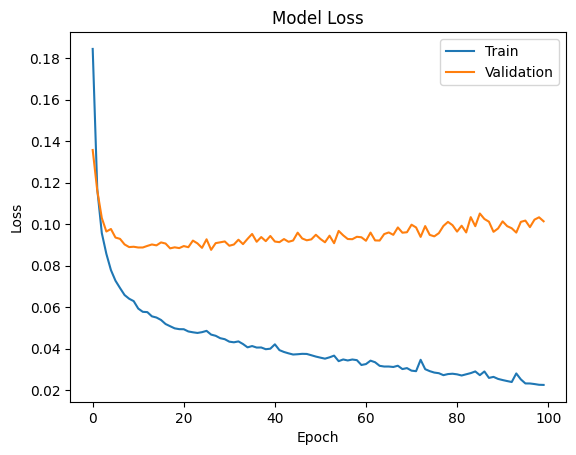

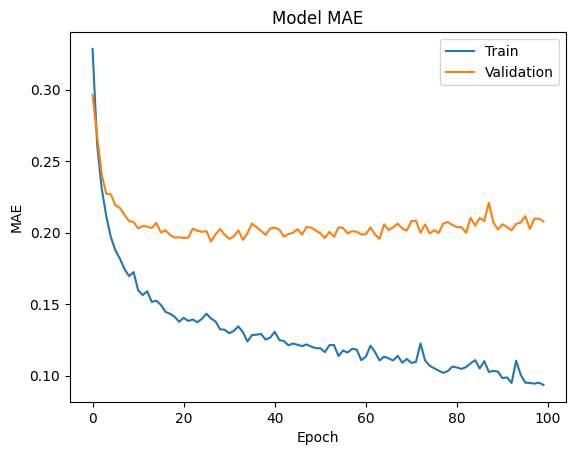

In [33]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot MAE
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

10/10 [==============================] - 0s 3ms/step


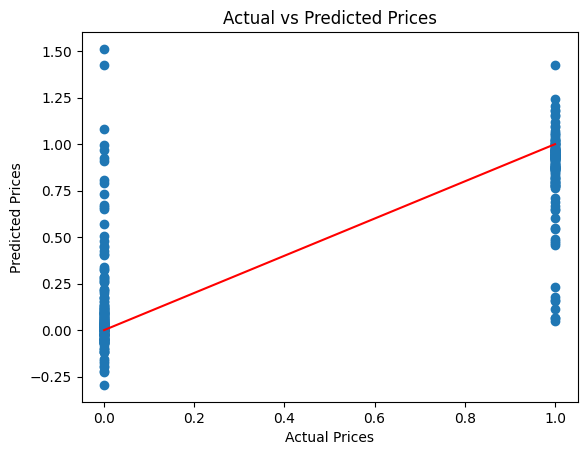

In [34]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for reference
plt.show()

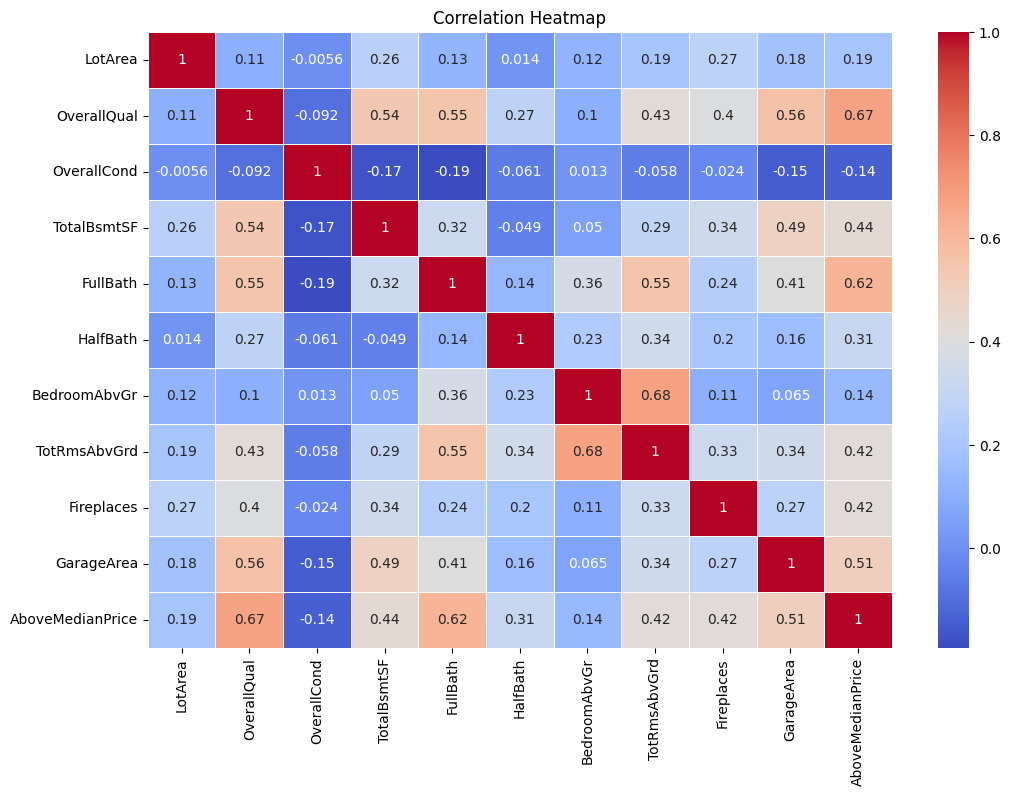

In [37]:
# Hitung matriks korelasi
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()